In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate mock dataset
np.random.seed(0)
num_samples = 1000

# Features: height and weight of animals
height = np.random.normal(loc=10, scale=2, size=num_samples)
weight = np.random.normal(loc=5, scale=1, size=num_samples)
animal_type = np.random.choice(['cat', 'dog'], size=num_samples)

data = pd.DataFrame({'Height': height, 'Weight': weight, 'Animal': animal_type})


In [4]:
data

,Height,Weight,Animal
0,13.528105,5.555963,dog
1,10.800314,5.892474,dog
2,11.957476,4.577685,cat
3,14.481786,5.104714,dog
4,13.735116,5.228053,cat
...,...,...,...
995,10.825742,5.097751,cat
996,9.603202,6.401523,dog
997,10.188385,5.158434,cat
998,7.704778,3.858099,dog


In [ ]:
X_train

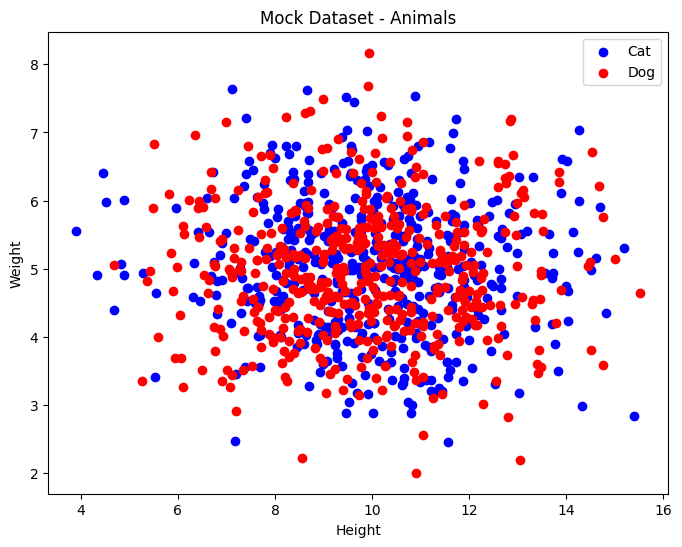

In [2]:
# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(data[data['Animal'] == 'cat']['Height'], data[data['Animal'] == 'cat']['Weight'], color='blue', label='Cat')
plt.scatter(data[data['Animal'] == 'dog']['Height'], data[data['Animal'] == 'dog']['Weight'], color='red', label='Dog')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Mock Dataset - Animals')
plt.legend()
plt.show()

In [5]:
# Preparing data for logistic regression
X = data[['Height', 'Weight']]
y = (data['Animal'] == 'cat').astype(int)  # 1 for cat, 0 for dog

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
X_train

,Height,Weight
687,6.778243,4.609202
500,10.765465,5.013240
332,11.546506,5.104907
979,9.235949,3.895876
817,13.363843,4.252527
...,...,...
835,11.734553,4.040745
192,9.921434,4.826536
629,9.997230,6.414874
559,8.476853,5.150115


In [7]:
y_train

687    1
500    1
332    0
979    1
817    0
      ..
835    1
192    0
629    0
559    1
684    1
Name: Animal, Length: 800, dtype: int64

In [8]:
# Create and train logistic regression model
log_reg = LogisticRegression()
history=log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)



Accuracy: 0.53
Confusion Matrix:
 [[46 52]
 [42 60]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


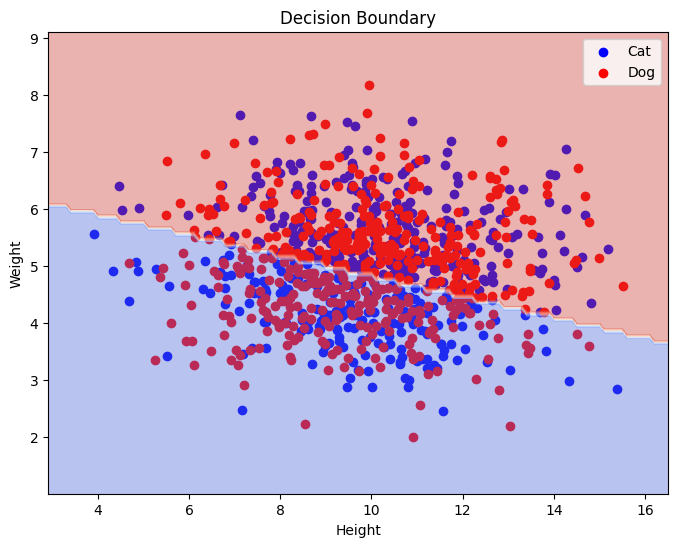

In [11]:
# Plotting decision boundary
def plot_decision_boundary(X, y, model):
    # Plot data points
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Cat')
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Dog')

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1), np.arange(x2_min, x2_max, 0.1))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.xlabel('Height')
    plt.ylabel('Weight')
    plt.title('Decision Boundary')
    plt.legend()
    plt.show()

# Plot decision boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(X.values, y.values, log_reg)



In [15]:
# Suppose we have a new animal with height 8 and weight 4
new_animal = np.array([[8, 4]])

# Predict if the new animal is a cat or a dog
prediction = log_reg.predict(new_animal)

if prediction == 1:
    print("The new animal is predicted to be a cat.")
else:
    print("The new animal is predicted to be a dog.")


The new animal is predicted to be a dog.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
